<a href="https://colab.research.google.com/github/nakamura196/ndl_ocr/blob/main/wikipedia%E3%81%A7%E5%85%AC%E9%96%8B%E3%81%95%E3%82%8C%E3%81%A6%E3%81%84%E3%82%8B%E7%94%BB%E5%83%8F%E3%82%92%E5%8F%96%E5%BE%97%E3%81%99%E3%82%8B%E6%96%B9%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# wikipediaで公開されている画像を取得する方法

api https://ja.wikipedia.org/w/api.php?action=query&prop=pageimages&format=json&titles=浅野総一郎&pithumbsize=300&piprop=original|thumbnail
url https://upload.wikimedia.org/wikipedia/commons/c/c4/Asano_souichiro.jpg


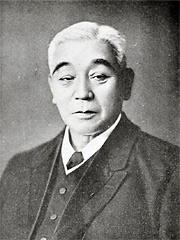

In [3]:
#@title 設定
base = "ja.wikipedia.org" #@param {type:"string"}
name = "\u6D45\u91CE\u7DCF\u4E00\u90CE" #@param {type:"string"}

import requests
import json
from IPython.display import Image,display_jpeg
import pprint

def getImage(base, ln):

  api = "https://{}/w/api.php?action=query&prop=pageimages&format=json&titles={}&pithumbsize=300&piprop=original|thumbnail".format(base, ln)
  print("api", api)
  df = requests.get(api).json()
  # pprint.pprint(df)
  pages = df["query"]["pages"]
  keys = pages.keys()

  obj = pages[list(keys)[0]]

  if "thumbnail" not in obj:
      return None

  url = obj["thumbnail"]["source"]
  return url

url = getImage(base, name)

print("url", url)

if url:
  display_jpeg(Image(url))